In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set_theme(style = "darkgrid")

In [37]:
data = pd.read_csv("bike_rentals.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0.0,1.0,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0.0,1.0,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0.0,1.0,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0.0,1.0,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0.0,1.0,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


In [39]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### MSNO For "Missingness"

We can use msno library to visualize if we have any missing data. 

<AxesSubplot:>

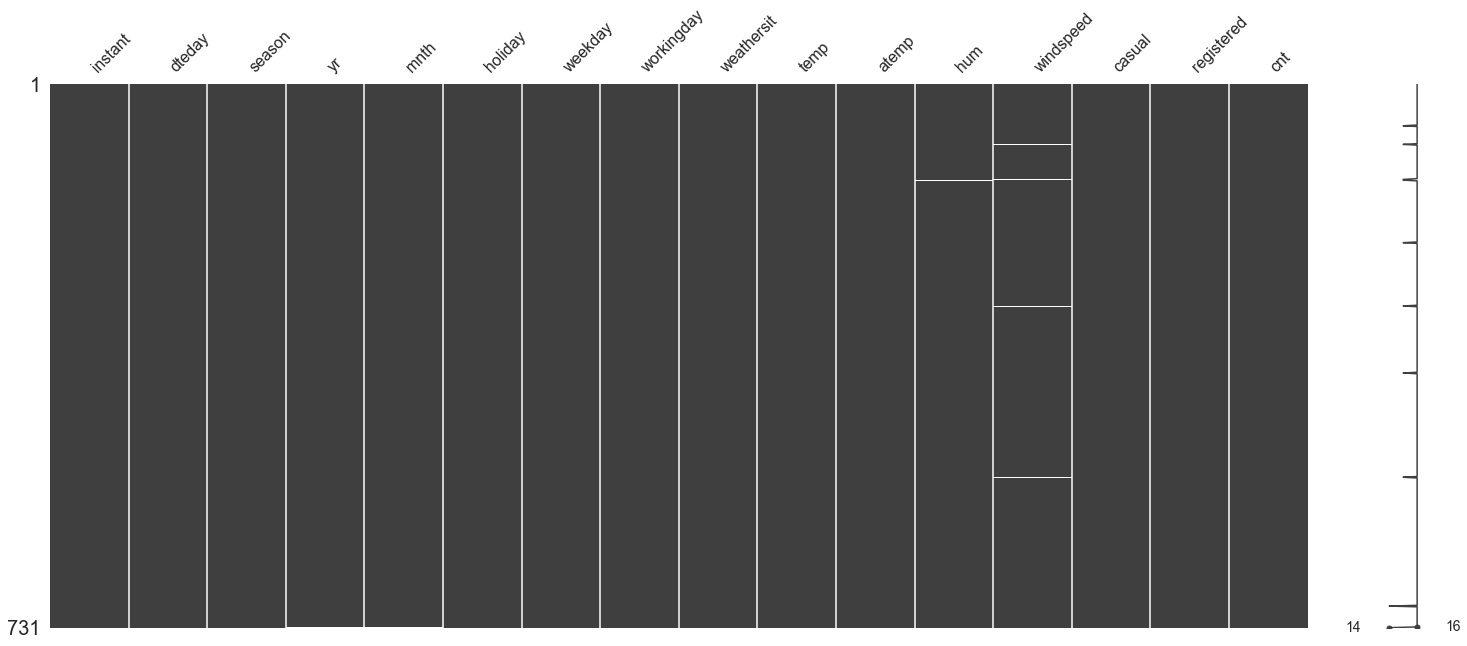

In [40]:
msno.matrix(data)

In [41]:
# Fill windspeed null values with median
data['windspeed'].fillna((data['windspeed'].median()), inplace=True)

In [42]:
# Groupby season with median
data.groupby(['season']).median()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,
1,366.0,0.5,2.0,0.0,3.0,1.0,1.0,0.285833,0.282821,0.543750,0.202750,218.0,1867.0,2209.0
2,308.5,0.5,5.0,0.0,3.0,1.0,1.0,0.562083,0.538212,0.646667,0.191546,867.0,3844.0,4941.5
3,401.5,0.5,8.0,0.0,3.0,1.0,1.0,0.714583,0.656575,0.635833,0.165115,1050.5,4110.5,5353.5
4,493.0,0.5,11.0,0.0,3.0,1.0,1.0,0.410000,0.409708,0.661042,0.167918,544.5,3815.0,4634.5


In [43]:
# Convert 'hum' null values to median of season
data['hum'] = data['hum'].fillna(data.groupby('season')['hum'].transform('median'))

In [44]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
# Compute mean temp and atemp by row
mean_temp = (data.iloc[700]['temp'] + data.iloc[702]['temp'])/2
mean_atemp = (data.iloc[700]['atemp'] + data.iloc[702]['atemp'])/2

# Replace null values with mean temperatures
data['temp'].fillna((mean_temp), inplace=True)
data['atemp'].fillna((mean_atemp), inplace=True)

In [47]:
# Convert 'dteday' to datetime object
data['dteday'] = pd.to_datetime(data['dteday'])

In [48]:
data['dteday'].apply(pd.to_datetime, infer_datetime_format=True, errors='coerce')

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [50]:
import datetime as dt

In [51]:
data['mnth'] = data['dteday'].dt.month

In [53]:
# Change row 730, column 'yr' to 1.0
data.loc[730, 'yr'] = 1.0

In [54]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1.0,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1.0,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1.0,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1.0,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1.0,12,0,1,0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [55]:
# Drop 'dteday' column
data = data.drop('dteday', axis=1)

In [56]:
# Drop 'casual', 'registered' columns
data = data.drop(['casual', 'registered'], axis=1)

In [61]:
data = data.drop(['atemp'], axis = 1)

In [75]:
data = data.drop(['instant'], axis = 1)

In [76]:
# Export 'bike_rentals_cleaned' csv file
data.to_csv('bike_rentals_cleaned.csv', index=False)

### Histogram

In [77]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0.0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0.0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0.0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0.0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0.0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1.0,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,1,1.0,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,1,1.0,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,1,1.0,12,0,0,0,1,0.255833,0.483333,0.350754,1796


<AxesSubplot:>

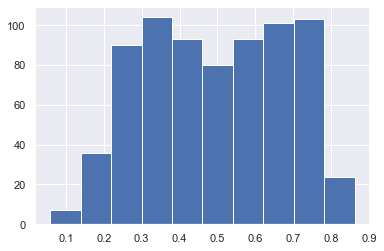

In [78]:
data["temp"].hist()

<AxesSubplot:>

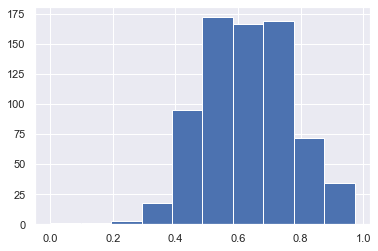

In [79]:
data["hum"].hist()

<AxesSubplot:>

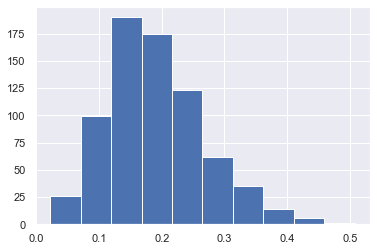

In [80]:
data["windspeed"].hist()

<AxesSubplot:>

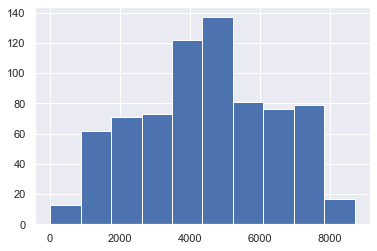

In [81]:
data["cnt"].hist()

<AxesSubplot:>

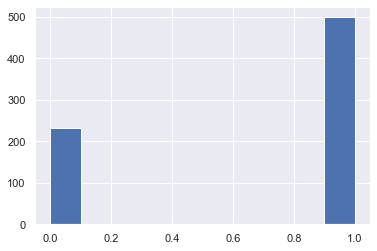

In [74]:
data["workingday"].hist()

### Catplot

In [82]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0.0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0.0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0.0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0.0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0.0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1.0,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,1,1.0,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,1,1.0,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,1,1.0,12,0,0,0,1,0.255833,0.483333,0.350754,1796


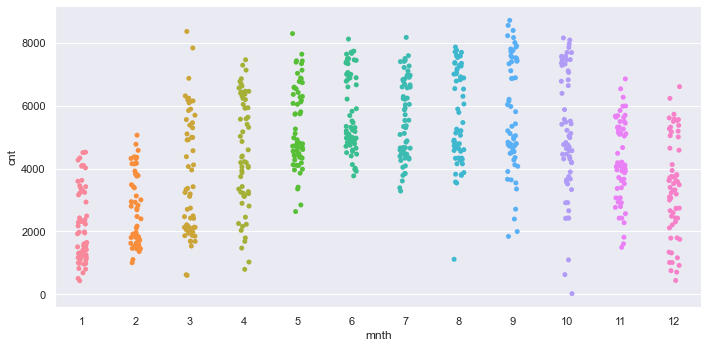

In [70]:
sns.catplot(x="mnth", y="cnt", data=data, aspect=2)

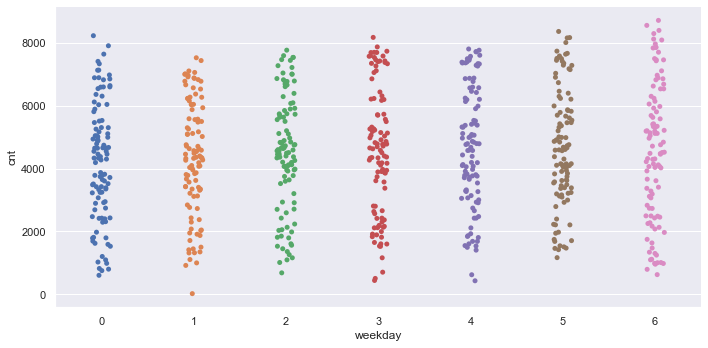

In [71]:
sns.catplot(x="weekday", y="cnt", data=data, aspect=2)

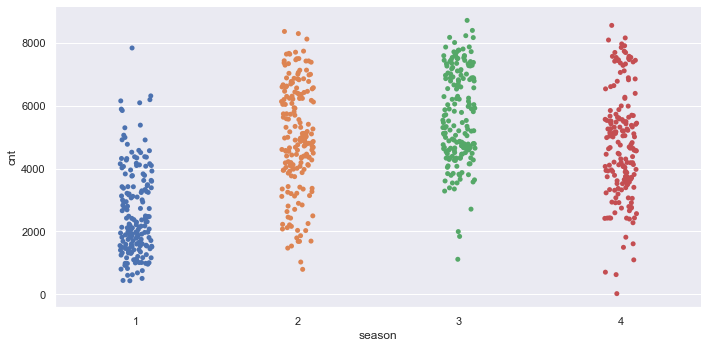

In [72]:
sns.catplot(x="season", y="cnt", data=data, aspect=2)

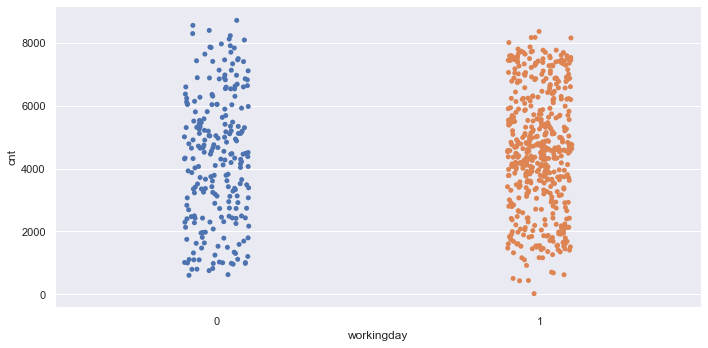

In [73]:
sns.catplot(x="workingday", y="cnt", data=data, aspect=2)

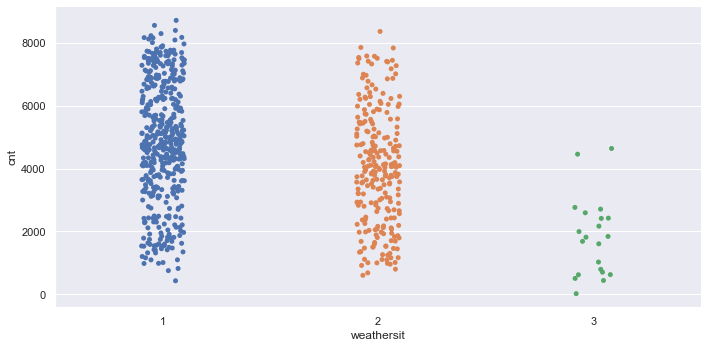

In [84]:
sns.catplot(x="weathersit", y="cnt", data=data, aspect=2)

### Box plots

In [85]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0.0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0.0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0.0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0.0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0.0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1.0,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,1,1.0,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,1,1.0,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,1,1.0,12,0,0,0,1,0.255833,0.483333,0.350754,1796


<AxesSubplot:xlabel='windspeed'>

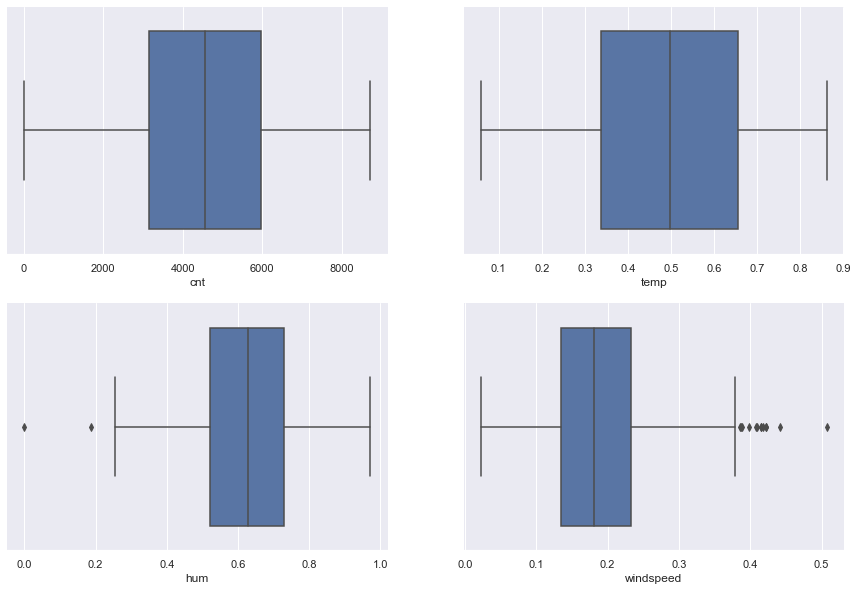

In [86]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.despine(left=True)

sns.boxplot(x=data["cnt"],ax=axes[0, 0])
sns.boxplot(x=data["temp"], ax=axes[0, 1])
sns.boxplot(x=data["hum"], ax=axes[1, 0])
sns.boxplot(x=data["windspeed"], ax=axes[1, 1])


### Heatmap

<AxesSubplot:>

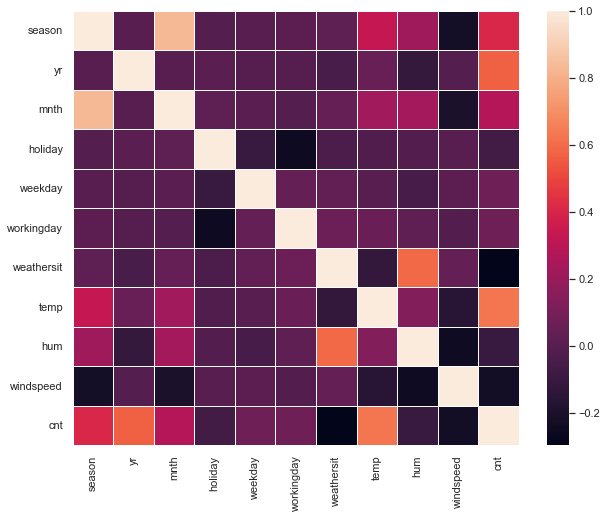

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), linewidths = 0.5)

### Scatter plot

<AxesSubplot:xlabel='temp', ylabel='cnt'>

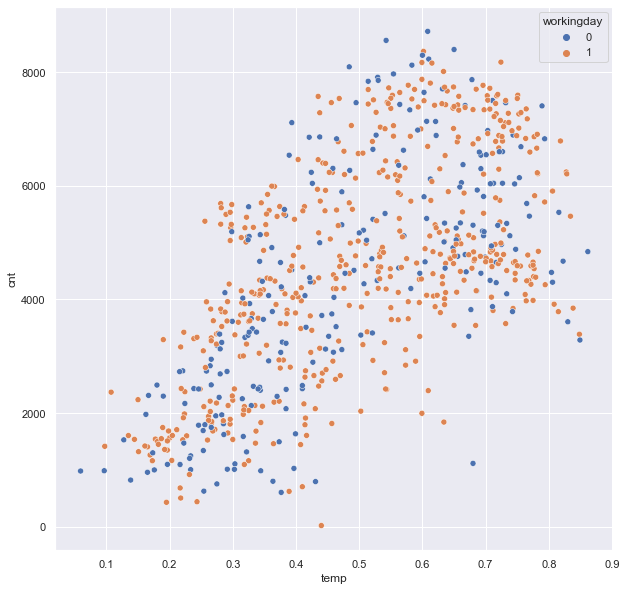

In [93]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temp", y="cnt", hue = "workingday", data=data)

<AxesSubplot:xlabel='temp', ylabel='cnt'>

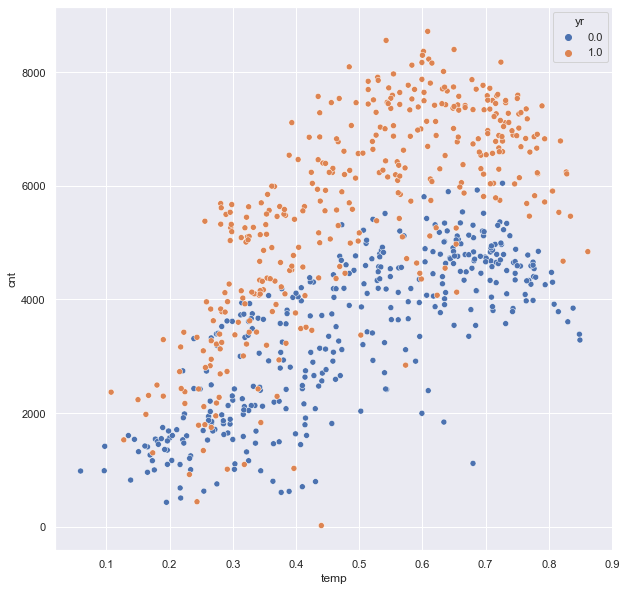

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temp", y="cnt", hue = "yr", data=data)

<AxesSubplot:xlabel='temp', ylabel='cnt'>

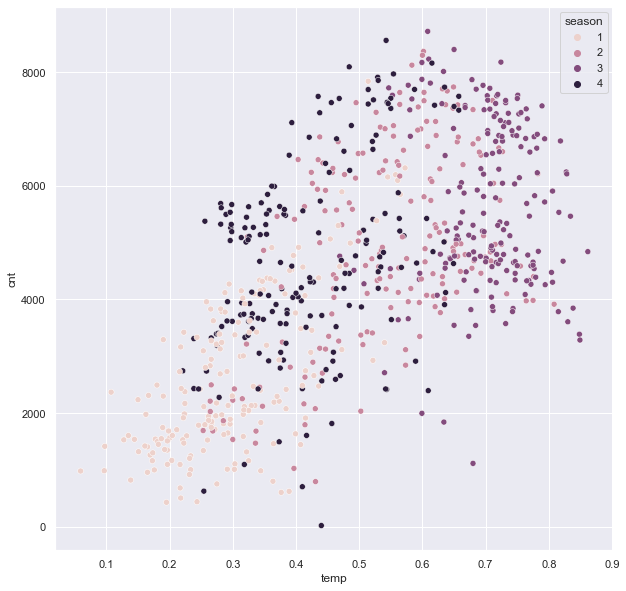

In [96]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temp", y="cnt", hue = "season", data=data)

### Violin plot

In [97]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0.0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0.0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0.0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0.0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0.0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1.0,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,1,1.0,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,1,1.0,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,1,1.0,12,0,0,0,1,0.255833,0.483333,0.350754,1796


<AxesSubplot:xlabel='season', ylabel='cnt'>

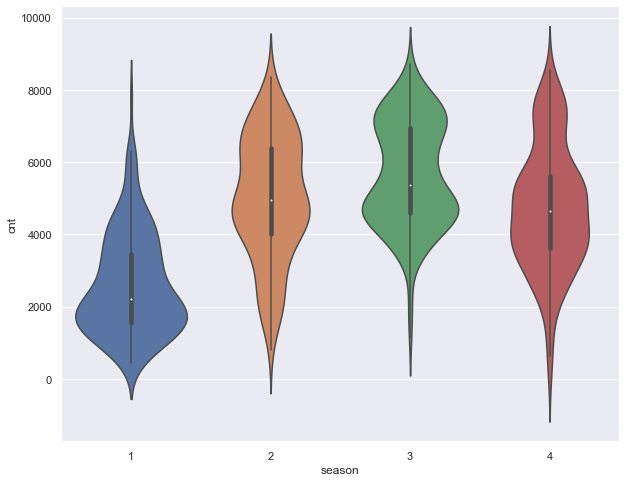

In [98]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(x="season", y="cnt", data=data)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

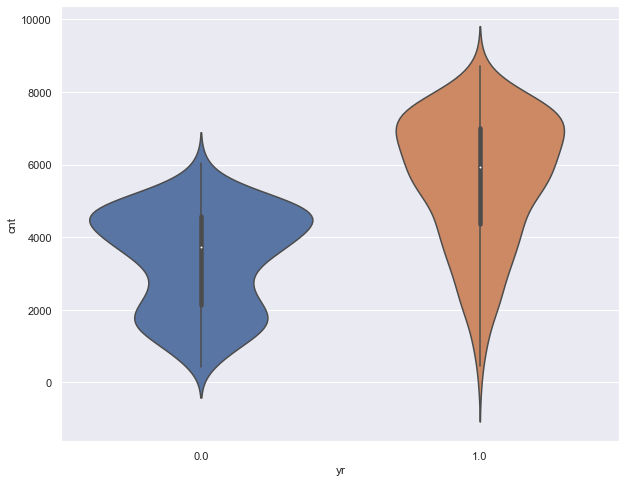

In [99]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(x="yr", y="cnt", data=data)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

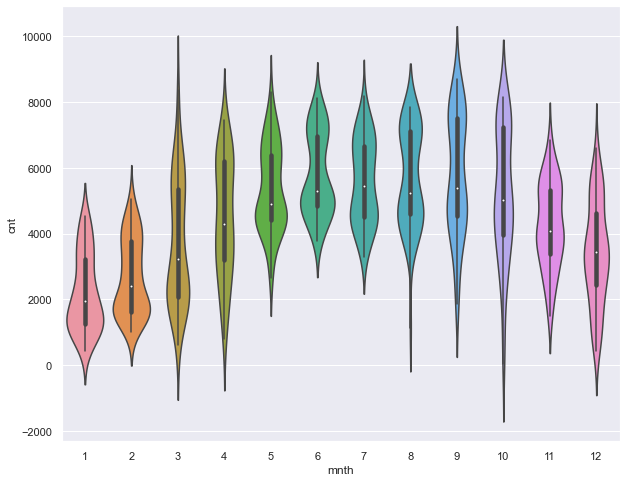

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(x="mnth", y="cnt", data=data)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

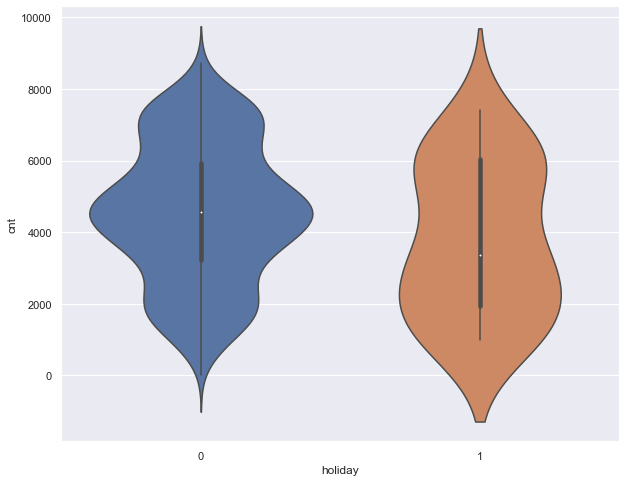

In [102]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(x="holiday", y="cnt", data=data)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

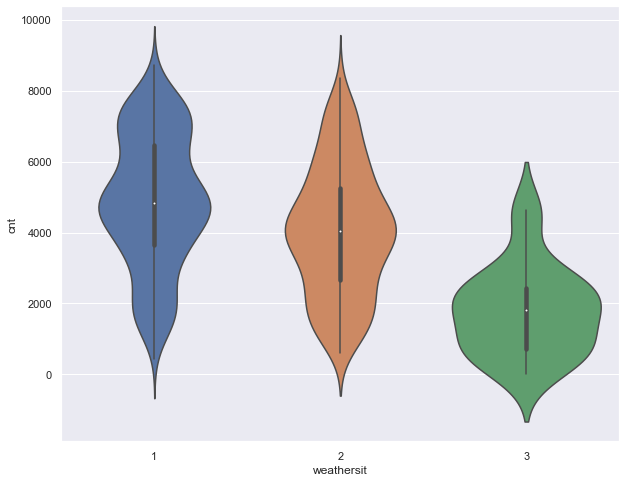

In [103]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(x="weathersit", y="cnt", data=data)

### Pair plot

In [104]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0.0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0.0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0.0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0.0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0.0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1.0,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,1,1.0,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,1,1.0,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,1,1.0,12,0,0,0,1,0.255833,0.483333,0.350754,1796


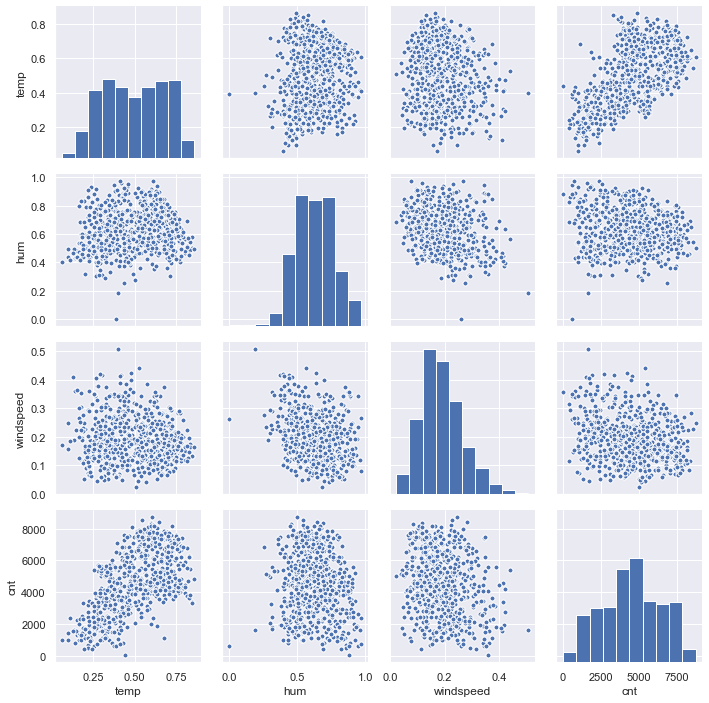

In [105]:
df = data[['temp','hum','windspeed','cnt']].copy()
df = df.dropna(thresh=4)
g = sns.PairGrid(df)
g = g.map_offdiag(plt.scatter, edgecolor="w", s=25)
g = g.map_diag(plt.hist)